In [1]:
#Import package and alias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#read the first csv file dailyActivity_merged
daily_activity = pd.read_csv("Fitabase_Data_41216-51216/dailyActivity_merged.csv")

In [3]:
#preview the first 10 rows of the data
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [4]:
#Check for missing values in each column
missing_value_count = daily_activity.isnull().sum()
missing_value_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
#Check the data types of each column
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
#Number of unique IDs in the dataset
unique_ids = len(pd.unique(daily_activity["Id"]))
unique_ids

33

In [7]:
#Convert the ActivityDate data type to datetime format 
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

In [8]:
#Check if the datatype is upadated
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [9]:
#Insert new columns- "DayOfTheWeek", "TotalMinutes", TotalHours"
new_cols = ['Id','ActivityDate','TotalSteps','DayOfTheWeek','TrackerDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','TotalDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','TotalMinutes','TotalHours','Calories']
df_activity = daily_activity.reindex(columns=new_cols)

In [10]:
#Preview with added columns
df_activity.head()

,Id,ActivityDate,TotalSteps,DayOfTheWeek,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,13162,NaN,8.50,0.0,1.88,0.55,6.06,0.0,8.50,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,10735,NaN,6.97,0.0,1.57,0.69,4.71,0.0,6.97,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,10460,NaN,6.74,0.0,2.44,0.40,3.91,0.0,6.74,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,9762,NaN,6.28,0.0,2.14,1.26,2.83,0.0,6.28,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,12669,NaN,8.16,0.0,2.71,0.41,5.04,0.0,8.16,36,10,221,773,NaN,NaN,1863


In [11]:
#Calculating Day of the week based on Date
df_activity["DayOfTheWeek"]=df_activity["ActivityDate"].dt.day_name()

In [12]:
df_activity.head()

,Id,ActivityDate,TotalSteps,DayOfTheWeek,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,13162,Tuesday,8.50,0.0,1.88,0.55,6.06,0.0,8.50,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,10735,Wednesday,6.97,0.0,1.57,0.69,4.71,0.0,6.97,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,10460,Thursday,6.74,0.0,2.44,0.40,3.91,0.0,6.74,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,9762,Friday,6.28,0.0,2.14,1.26,2.83,0.0,6.28,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,12669,Saturday,8.16,0.0,2.71,0.41,5.04,0.0,8.16,36,10,221,773,NaN,NaN,1863


In [13]:
#Calculating Total Minutes utilized throughout the day
col_names= ["VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes"]
df_activity["TotalMinutes"]=df_activity[col_names].sum(axis=1)

df_activity["TotalMinutes"].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMinutes, dtype: int64

In [14]:
#Converting minutes to hours
df_activity["TotalHours"]=round(df_activity["TotalMinutes"]/60)

df_activity["TotalHours"].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalHours, dtype: float64

In [15]:
#Updated new Columns with values
df_activity.head()

,Id,ActivityDate,TotalSteps,DayOfTheWeek,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,13162,Tuesday,8.50,0.0,1.88,0.55,6.06,0.0,8.50,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,10735,Wednesday,6.97,0.0,1.57,0.69,4.71,0.0,6.97,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,10460,Thursday,6.74,0.0,2.44,0.40,3.91,0.0,6.74,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,9762,Friday,6.28,0.0,2.14,1.26,2.83,0.0,6.28,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,12669,Saturday,8.16,0.0,2.71,0.41,5.04,0.0,8.16,36,10,221,773,1040,17.0,1863


In [16]:
#Finding the summary of the data
df_activity.describe()

,Id,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,5.489702,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,3.924606,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,2.620000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,5.245000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,28.030001,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


Visulizing the first data set "dailyActivity_merged" :

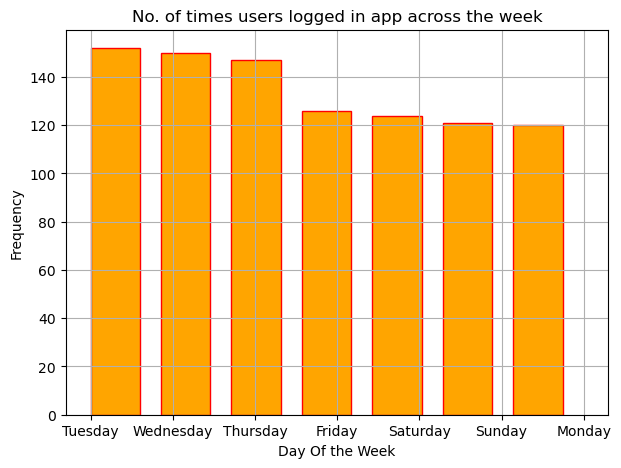

In [17]:
#Plotting Histogram
plt.style.use("default")
plt.figure(figsize=(7,5))
plt.hist(df_activity.DayOfTheWeek, bins=7, width=0.6,color="orange",edgecolor="red")

plt.xlabel("Day Of the Week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

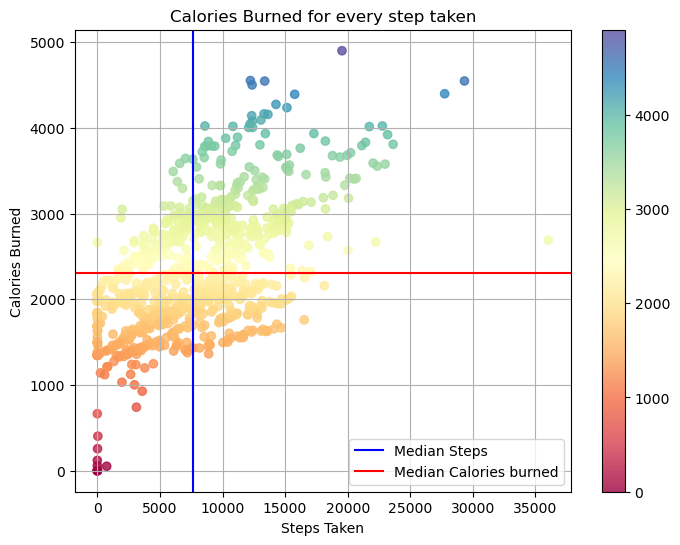

In [18]:
#plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.TotalSteps,df_activity.Calories, 
            alpha = 0.8, c=df_activity.Calories, cmap= "Spectral")

#add annotations
from statistics import mean
median_calories = round(mean(df_activity.Calories))
median_steps = round(mean(df_activity.TotalSteps))

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps,color = "Blue", label = "Median Steps")
plt.axhline(median_calories, color="Red", label= "Median Calories burned")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

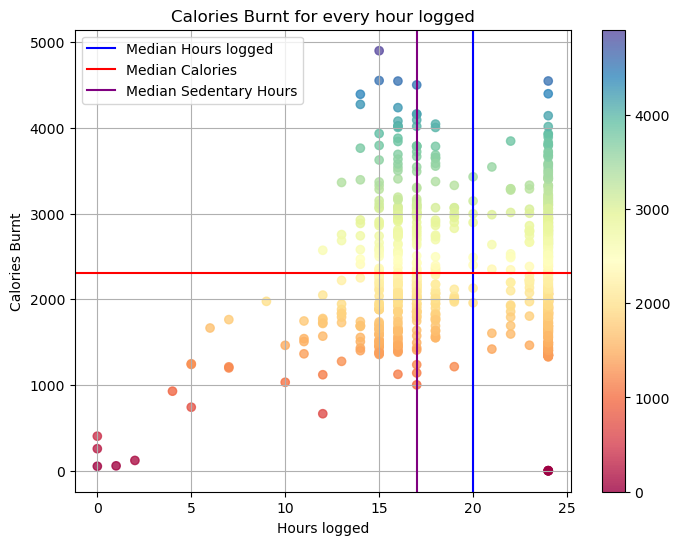

In [19]:
#Plotting Hours vs Calories
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.TotalHours,df_activity.Calories,
            alpha = 0.8, c=df_activity.Calories, cmap="Spectral")

#annotations
from statistics import mean
median_calories=round(mean(df_activity.Calories))
median_hours=round(mean(df_activity.TotalHours))
median_sedentary_hours=round(mean(df_activity.SedentaryMinutes/60))

#labelling
plt.colorbar(orientation = "vertical")
plt.axvline(median_hours,label = "Median Hours logged",color="blue")
plt.axhline(median_calories,label="Median Calories",color="red")
plt.axvline(median_sedentary_hours,label="Median Sedentary Hours",color="purple")
plt.title("Calories Burnt for every hour logged")
plt.xlabel("Hours logged")
plt.ylabel("Calories Burnt")
plt.grid(True)
plt.legend()
plt.show()

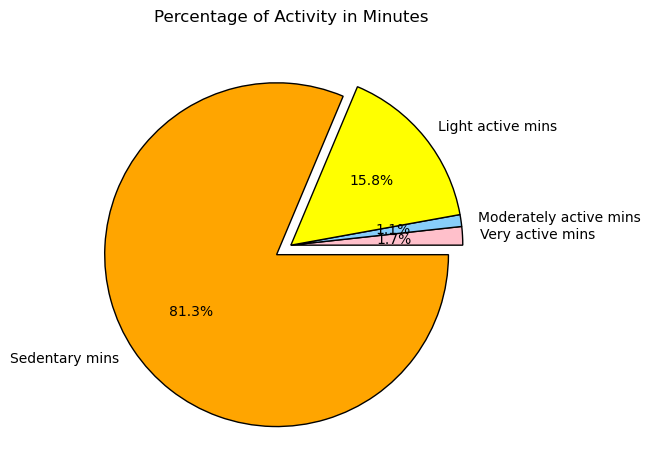

In [20]:
#calculating total of individual minutes column
very_active_mins = df_activity["VeryActiveMinutes"].sum()
light_active_mins = df_activity["LightlyActiveMinutes"].sum()
moderately_active_mins = df_activity["FairlyActiveMinutes"].sum()
sedentary_mins = df_activity["SedentaryMinutes"].sum()

#plotting pie chart
slices = [very_active_mins,moderately_active_mins,light_active_mins,sedentary_mins]
labels = ["Very active mins","Moderately active mins","Light active mins","Sedentary mins"]
colors = ["pink","lightskyblue","yellow","orange"]
explode = [0,0,0,0.1]
plt.style.use("default")
plt.pie(slices,labels= labels, colors = colors, wedgeprops={"edgecolor":"black"}, explode=explode, autopct = "%1.1f%%")

plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

In [21]:
# Analysing Sleep file.
#Read sleepDay_merged csv file
sleep_day = pd.read_csv("Fitabase_Data_41216-51216/sleepDay_merged.csv")

In [22]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [23]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [24]:
#Number of Unique IDs in Sleep file
len(pd.unique(sleep_day["Id"]))

24

In [25]:
#Checking for null or missing values for each column
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [26]:
#Converting SleepDay datatype to datetime format
sleep_day["SleepDay"] = pd.to_datetime(sleep_day["SleepDay"], format= '%m/%d/%Y %I:%M:%S %p')

In [27]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [28]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [29]:
#merging sleep_day data frame and df_activity on the basis of ID and Activity date
df_new = pd.merge(df_activity,sleep_day,left_on=['Id','ActivityDate'], right_on=['Id','SleepDay'], how="inner")

In [30]:
df_new.head(5)

,Id,ActivityDate,TotalSteps,DayOfTheWeek,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,Tuesday,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1094,18.0,1985,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,Wednesday,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1033,17.0,1797,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,Friday,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,998,17.0,1745,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,Saturday,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1040,17.0,1863,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,Sunday,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,761,13.0,1728,2016-04-17,1,700,712


In [31]:
#Deleting the redundant date couln "SleepDay"
del df_new['SleepDay']

In [32]:
#remaning the ActivityDate column To Date
df_new.rename(columns={'ActivityDate':'Date'},inplace=True)

In [33]:
df_new.head()

,Id,Date,TotalSteps,DayOfTheWeek,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,Tuesday,8.50,0.0,1.88,0.55,6.06,0.0,...,25,13,328,728,1094,18.0,1985,1,327,346
1,1503960366,2016-04-13,10735,Wednesday,6.97,0.0,1.57,0.69,4.71,0.0,...,21,19,217,776,1033,17.0,1797,2,384,407
2,1503960366,2016-04-15,9762,Friday,6.28,0.0,2.14,1.26,2.83,0.0,...,29,34,209,726,998,17.0,1745,1,412,442
3,1503960366,2016-04-16,12669,Saturday,8.16,0.0,2.71,0.41,5.04,0.0,...,36,10,221,773,1040,17.0,1863,2,340,367
4,1503960366,2016-04-17,9705,Sunday,6.48,0.0,3.19,0.78,2.51,0.0,...,38,20,164,539,761,13.0,1728,1,700,712


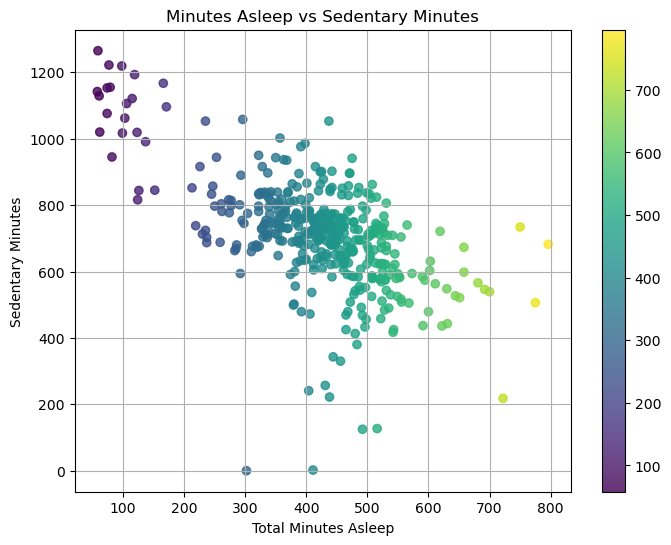

In [34]:
#plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_new.TotalMinutesAsleep,df_new.SedentaryMinutes, 
            alpha = 0.8, c=df_new.TotalMinutesAsleep)


plt.colorbar(orientation = "vertical")
plt.ylabel("Sedentary Minutes")
plt.xlabel("Total Minutes Asleep")
plt.title("Minutes Asleep vs Sedentary Minutes")
plt.grid(True)
#plt.legend()
plt.show()

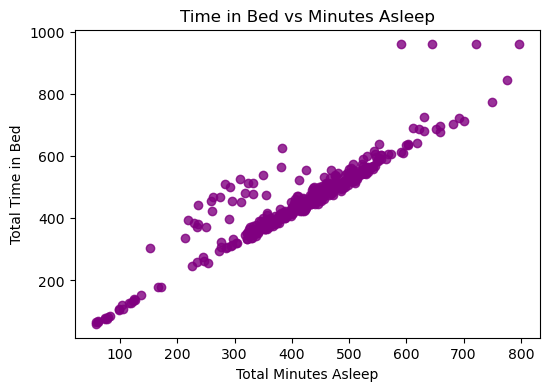

In [35]:
plt.style.use("default")
plt.figure(figsize=(6,4))
plt.scatter(df_new.TotalMinutesAsleep,df_new.TotalTimeInBed, alpha=0.8, c="purple")
plt.ylabel("Total Time in Bed")
plt.xlabel("Total Minutes Asleep")
plt.title("Time in Bed vs Minutes Asleep")
plt.show()

In [36]:
#raeding HourlyIntensities_merged data file.

hourly_intensities= pd.read_csv("Fitabase_Data_41216-51216/hourlyIntensities_merged.csv")

In [37]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [38]:
hourly_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [39]:
hourly_intensities.isnull().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [40]:
#Converting the ActivityHour in datetime format
hourly_intensities["ActivityHour"] = pd.to_datetime(hourly_intensities["ActivityHour"], format= '%m/%d/%Y %I:%M:%S %p')

In [41]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


In [42]:
#craeting a new column to only display Activity Time
#Extracting time from datetime Activity Hour
hourly_intensities['ActivityTime']=pd.to_datetime(hourly_intensities['ActivityHour']).dt.time
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,ActivityTime
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00


In [43]:
#Grouping by time
df_intensity = hourly_intensities.groupby('ActivityTime')['TotalIntensity'].mean()
df_intensity

ActivityTime
00:00:00     2.129550
01:00:00     1.419078
02:00:00     1.043944
03:00:00     0.443730
04:00:00     0.633047
05:00:00     4.950644
06:00:00     7.771214
07:00:00    10.733620
08:00:00    14.668099
09:00:00    15.387755
10:00:00    17.643703
11:00:00    16.921251
12:00:00    19.847072
13:00:00    18.775244
14:00:00    18.868621
15:00:00    15.584699
16:00:00    17.716648
17:00:00    21.655629
18:00:00    21.921634
19:00:00    21.385210
20:00:00    14.339956
21:00:00    12.072928
22:00:00     9.063053
23:00:00     4.996678
Name: TotalIntensity, dtype: float64

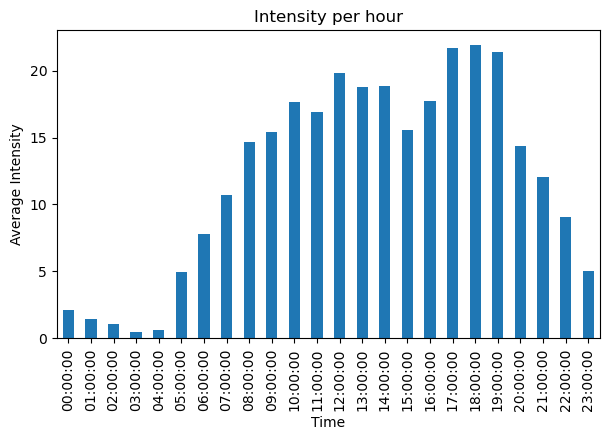

In [44]:
#Plotting Bar Graph
df_intensity.plot(kind='bar', title='Intensity per hour', ylabel='Average Intensity',
         xlabel='Time', figsize=(7, 4))
plt.show()